In [99]:
import pandas as pd
import numpy as np

Перейдем к практике!
Представьте, что вы аналитик в сервисе такси. Ваша задача – написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием. Более подробно ознакомиться с формулой можно здесь (https://medium.com/@congyuzhou/%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5-%D0%BC%D0%B5%D0%B6%D0%B4%D1%83-%D0%B4%D0%B2%D1%83%D0%BC%D1%8F-%D1%82%D0%BE%D1%87%D0%BA%D0%B0%D0%BC%D0%B8-%D0%BD%D0%B0-%D0%BF%D0%BE%D0%B2%D0%B5%D1%80%D1%85%D0%BD%D0%BE%D1%81%D1%82%D0%B8-%D0%B7%D0%B5%D0%BC%D0%BB%D0%B8-a398352bfbde).

In [100]:
nyc = pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip')

In [101]:
nyc

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [102]:
latitude1, latitude2, longitude1, longitude2 = 0, 1, 0, 1
radius = 6371

In [103]:
lat_sin = np.sin((latitude2-latitude1)/2) ** 2
lat_cos =  np.cos(latitude1) * np.cos(latitude2)
long_sin = np.sin((longitude2-longitude1)/2) ** 2

In [104]:
2 * radius * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

8120.194889073402

In [105]:
def haversine(latitude1, longitude1, latitude2, longitude2, r = 6371):
    latitude1, longitude1, latitude2, longitude2 = [np.deg2rad(x) for x in (latitude1, longitude1, latitude2, longitude2)]
    
    lat_sin = np.sin((latitude2-latitude1)/2) ** 2
    lat_cos =  np.cos(latitude1) * np.cos(latitude2)
    long_sin = np.sin((longitude2-longitude1)/2) ** 2
    
    return 2 * r * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

In [106]:
haversine(50,51,50,51)

0.0

In [107]:
distances = []
for i, row in nyc.iterrows():
    distance = haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude)
    distances.append(distance)

In [108]:
df['distances'] = distances

In [109]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distances
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


На первый взгляд, pd.iterrows() вполне хорошо справляется со своей задачей и выполнение операции не занимает много времени!  

Давайте попробуем еще один метод, pd.itertuples, который на каждой итерации возвращает именованный кортеж (named tuple) для каждой строки датафрейма. Параметр index по умолчанию равен True, поэтому первым элементом кортежа следует индекс, далее — содержимое строки. 

In [110]:
def haversine(latitude1, longitude1, latitude2, longitude2, r = 6371):
    latitude1, longitude1, latitude2, longitude2 = [np.deg2rad(x) for x in (latitude1, longitude1, latitude2, longitude2)]
    
    lat_sin = np.sin((latitude2-latitude1)/2) ** 2
    lat_cos =  np.cos(latitude1) * np.cos(latitude2)
    long_sin = np.sin((longitude2-longitude1)/2) ** 2
    
    return 2 * r * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

distances = []
for row in nyc.itertuples():
    distance = haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude)
    distances.append(distance)
nyc['distance'] = pd.Series(distances)

Еще один часто используемый метод pd.apply() применяет заданную функцию вдоль определенной оси (axis=0 – строки; axis=1 – столбцы), и является более эффективным способом, чем pd.iterrows() за счет использования внутренних оптимизаций в pandas. Тем не менее, все равно подразумевает итерацию по всем рядам.

In [111]:
nyc['distance'] = nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(
    lambda x: haversine(x[0], x[1], x[2], x[3]), axis = 1)
longest = nyc['distance'].max()
longest

8667.818812217458

В целом, itertuples — это именно то, что нам нужно! Но есть пара моментов.

Оказывается, в нашем случае itertuples — не предел. На всех предыдущих шагах мы использовали циклы, что не очень хорошо. Почему же?

Базовые объекты в pandas — Series и DataFrame, которые представляют собой одномерные и двумерные массивы (arrays) соответственно. Так, векторизация — процесс выполнения операций над массивами. В pandas есть довольно большой набор векторизованных функций, и их использование во многих случаях предпочтительнее обычных циклов, поскольку они предназначены для работы именно с Series. К таким функциям относятся, например, sum и agg. С помощью векторизации можно получить ещё большее ускорение, значительно уменьшив количество итераций. Иными словами, действия будут происходят сразу над всей серией, а не над каждым элементом по отдельности.

Изменения в коде весьма незначительны: передаем функции на вход необходимые колонки, и получается магия!

df['distance'] = haversine(df['col1'], df['col2'], df['col3'], df['col4'])
Убедимся, что векторизованные операции работают намного быстрее! Создайте функцию для подсчета расстояния haversine, описанную в первом степе, и примените её к датасету nyc. Результат сохраните в колонку distance. 

In [112]:
nyc['distance'] = haversine(nyc['pickup_latitude'], nyc['pickup_longitude'], nyc['dropoff_latitude'], nyc['dropoff_longitude'])

Don't stop me now, можно еще быстрее! Опять же, все довольно просто.

В предыдущем степе мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции. 

df['distance'] = haversine(df['col1'].values, df['col2'].values, df['col3'].values, df['col4'].values)
Как выглядят данные такого формата? 

df.pickup_longitude.values
array([-73.844311, -74.016048, -73.982738, ..., -74.002698, -73.946062,
   -73.932603])
Создайте функцию для подсчета расстояния haversine, описанную в первом степе, и примените её к датасету nyc. Результат сохраните в колонку distance.

In [113]:
nyc['distance'] = haversine(nyc['pickup_latitude'].values, 
                                nyc['pickup_longitude'].values, 
                                nyc['dropoff_latitude'].values,
                                nyc['dropoff_longitude'].values)

Давайте подробнее посмотрим на информацию о самой длинной поездке в датасете nyc с 50 000 наблюдений.

key                  2012-05-12 10:48:00.00000020
fare_amount                                  49.8
pickup_datetime         2012-05-12 10:48:00+00:00
pickup_longitude                         -74.0149
pickup_latitude                           40.7134
dropoff_longitude                               0
dropoff_latitude                                0
passenger_count                                 1
distance                                  8667.82
Name: 48996, dtype: object
 

Как вы уже заметили, произошло что-то странное: в качестве широты и долготы стоят нулевые значения, а расстояние — целых 8667 км! Неужели наш пассажир действительно уехал так далеко?

Посмотрите, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажите количество таких случаев.

In [114]:
nyc.query('dropoff_longitude == 0 or dropoff_latitude == 0').shape

(958, 9)

Предположим, наша цель всё ещё состоит в поиске самых дальних поездок. Естественно, текущие данные совсем не годятся — некоторые такси, согласно данным, уезжают и приезжают из океана.

Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных (в итоге – 4 галочки).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbbb5b8da0>,
      dtype=object)

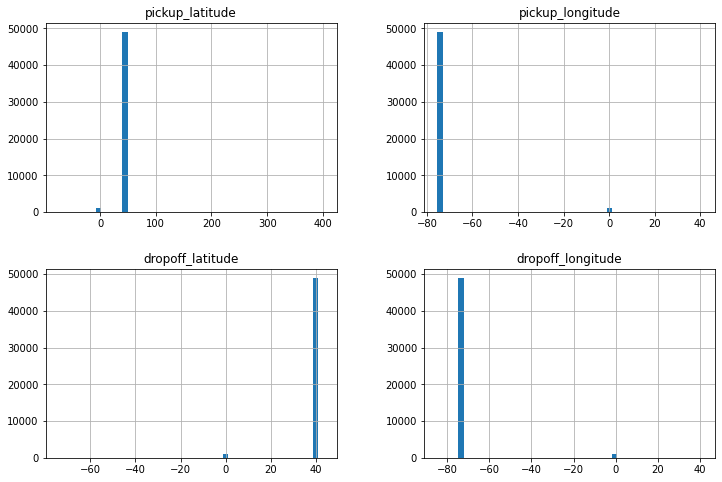

In [119]:
nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude','dropoff_longitude']].hist(figsize = (12,8), bins = 50)

Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.

Для фильтрации используйте условия из предыдущего степа, а также добавьте еще одно ограничение для переменной distance. Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 километров, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.

В качестве ответа укажите сумму, которую заплатил пассажир, проехавший наибольшее расстояние.

In [125]:
filtered_nyc = nyc.query('(pickup_longitude < -60) and (pickup_latitude < 120) and (pickup_latitude > 10) and (dropoff_latitude > 10) and (dropoff_longitude < -60) and distance <= 50')
filtered_nyc.query('distance == distance.max()')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.0,2014-02-22 02:44:00 UTC,-73.98954,40.757032,-73.86058,41.147487,1,44.746988
